In [14]:
# ============================================================
# HUGGING FACE EMBEDDINGS - SIMPLE EXAMPLE
# Run this in Google Colab!
# ============================================================

# CELL 1: Install & Import
# ============================================================

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

print("✅ Ready!")

✅ Ready!


In [15]:
# CELL 2: Load Pre-trained Model
# ============================================================

# Load model (downloads ~250MB first time)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

print("✅ Model loaded!")

✅ Model loaded!


In [16]:
# CELL 3: Get Embedding for Any Text
# ============================================================

def get_embedding(text):
    """Convert text to embedding vector"""
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use [CLS] token as sentence embedding
    embedding = outputs.last_hidden_state[:, 0, :].numpy()[0]
    return embedding

# Test it!
text = ["I love this movie"]
embedding = get_embedding(text)

print(f"Text: '{text}'")
print(f"Embedding shape: {embedding.shape}")
print(f"First 5 values: {embedding[:5]}")

Text: '['I love this movie']'
Embedding shape: (768,)
First 5 values: [-0.00704049 -0.09444179  0.13432837 -0.17705667 -0.01693134]


In [17]:
# CELL 4: Compare Similarity Between Texts
# ============================================================

def cosine_similarity(vec1, vec2):
    """Calculate similarity between two vectors"""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Get embeddings
emb1 = get_embedding("I love this movie")
emb2 = get_embedding("This film is great")
emb3 = get_embedding("the weather is bad today")

# Compare
print("Similarities:")
print(f"  'I love this movie' vs 'This film is great': {cosine_similarity(emb1, emb2):.3f}")
print(f"  'I love this movie' vs 'the weather is bad today':  {cosine_similarity(emb1, emb3):.3f}")


Similarities:
  'I love this movie' vs 'This film is great': 0.953
  'I love this movie' vs 'the weather is bad today':  0.941


In [18]:
# CELL 5: Try Your Own!
# ============================================================

# Change these texts and run!
text_a = "The weather is beautiful today"
text_b = "It's a sunny and lovely day"
text_c = "I need to buy groceries"

emb_a = get_embedding(text_a)
emb_b = get_embedding(text_b)
emb_c = get_embedding(text_c)

print(f"'{text_a}' vs '{text_b}': {cosine_similarity(emb_a, emb_b):.3f}")
print(f"'{text_a}' vs '{text_c}': {cosine_similarity(emb_a, emb_c):.3f}")


'The weather is beautiful today' vs 'It's a sunny and lovely day': 0.962
'The weather is beautiful today' vs 'I need to buy groceries': 0.926


/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kyle-anthonyhay/Documents/CODE/Revature-Training/Ai-Engineering/December/venv/lib/python3.12/site-pack

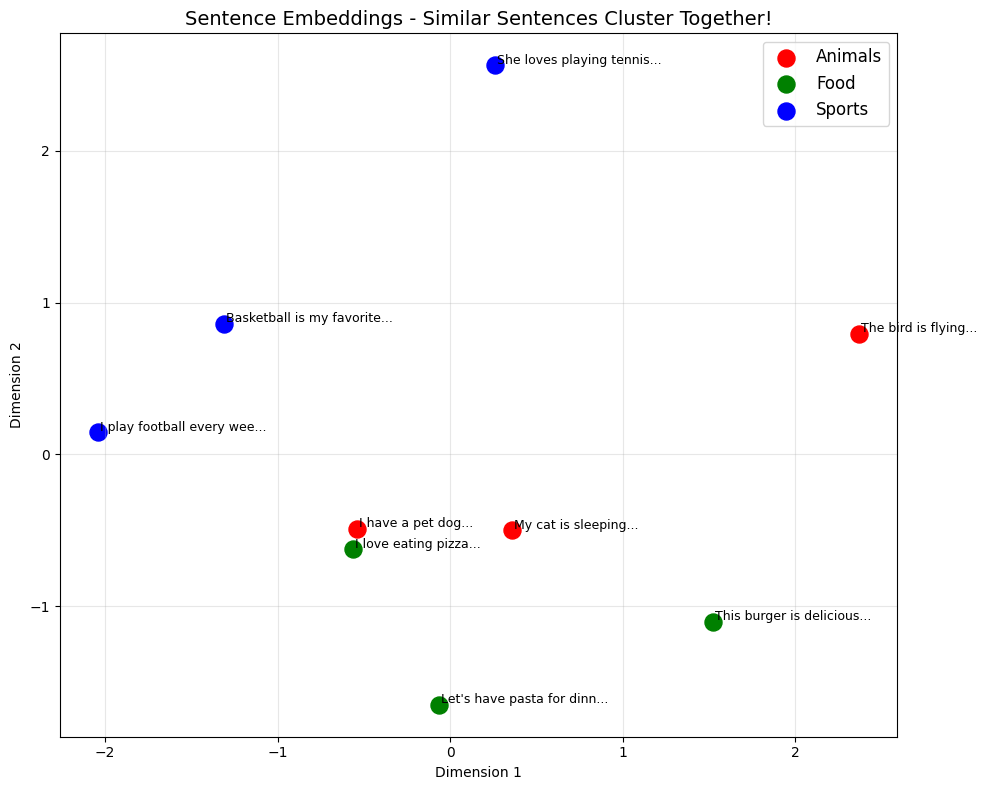

💡 Notice: Animals, Food, and Sports sentences form separate clusters!


In [19]:
# CELL 6: Visualize Embeddings in 2D Graph
# ============================================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Different categories of sentences
sentences = [
    # Animals (will cluster together)
    "I have a pet dog",
    "My cat is sleeping",
    "The bird is flying",

    # Food (will cluster together)
    "I love eating pizza",
    "This burger is delicious",
    "Let's have pasta for dinner",

    # Sports (will cluster together)
    "I play football every weekend",
    "She loves playing tennis",
    "Basketball is my favorite sport",
]

# Labels for coloring
categories = ["Animals", "Animals", "Animals",
              "Food", "Food", "Food",
              "Sports", "Sports", "Sports"]

colors = {"Animals": "red", "Food": "green", "Sports": "blue"}

# Get embeddings for all sentences
embeddings = np.array([get_embedding(s) for s in sentences])

# Reduce 768 dimensions to 2D for plotting
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 8))

for i, (x, y) in enumerate(embeddings_2d):
    plt.scatter(x, y, c=colors[categories[i]], s=150)
    plt.annotate(sentences[i][:25] + "...", (x + 0.01, y + 0.01), fontsize=9)

# Legend
for cat, color in colors.items():
    plt.scatter([], [], c=color, s=150, label=cat)
plt.legend(fontsize=12)

plt.title("Sentence Embeddings - Similar Sentences Cluster Together!", fontsize=14)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 Notice: Animals, Food, and Sports sentences form separate clusters!")

# Tensor Flow 

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

# Load the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def get_embedding_tf(text):
    """Convert text to embedding vector"""
    if isinstance(text, str):
        text = [text]
    return embed(text).numpy()[0]

def cosine_similarity(vec1, vec2):
    """Calculate similarity between two vectors"""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Get embeddings
emb1 = get_embedding_tf("I love this movie")
emb2 = get_embedding_tf("This film is great")
emb3 = get_embedding_tf("the weather is bad today")

# Compare
print("Similarities:")
print(f"  'I love this movie' vs 'This film is great': {cosine_similarity(emb1, emb2):.3f}")
print(f"  'I love this movie' vs 'the weather is bad today':  {cosine_similarity(emb1, emb3):.3f}")

Similarities:
  'I love this movie' vs 'This film is great': 0.808
  'I love this movie' vs 'the weather is bad today':  0.006


In [23]:
from tensorflow import keras
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


# -------------------------------
# Model Definition
# -------------------------------
vocab_size = 5000
embed_dim = 32
num_heads = 2
ff_dim = 64

transformer_model = keras.Sequential([
    layers.Embedding(vocab_size, embed_dim),
    TransformerBlock(embed_dim, num_heads, ff_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation="sigmoid"),
])

transformer_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("Training Transformer...")
transformer_model.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=64,
    verbose=0
)

transformer_acc = transformer_model.evaluate(x_test, y_test, verbose=0)[1]
print(f"✅ Transformer Accuracy: {transformer_acc:.1%}")

Training Transformer...


NameError: name 'x_train' is not defined